dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


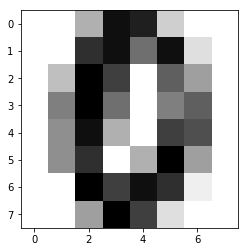

0.9805013927576601
0.9805013927576601
0.9805013927576601
[[ 0  0  0  0  0  0  0  0  0  7 10 10 10  2  0  0  0 12  2  1  6 11  0  0
   0 11  4  0  6 10  0  0  0  2  4 12 12  1  0  0  0  3 14  6  0  0  0  0
   0  3 11  9 10 10  4  0  0  0  0  0  0  0  0  0]]
[2]


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets

import sys#引用不在一个文件夹中的.py文件
sys.path.append(r'.\Pycharm\KNN_function')
from selection_data import train_test_split
from KNN2 import KNNClassifier
from accuracy import accuracy_score

digits = datasets.load_digits()
print(digits.keys())
x = digits.data#8*8的手写数字的颜色深度，共1797个数据，64维
y = digits.target#0到9的标签
some_digit = x[666]
y[666]

#可视化
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap = mpl.cm.binary)
plt.show()

#%run C:\Users\TH\Desktop\ML\Pycharm\KNN_function\selection_data
x_train,x_test,y_train,y_test = train_test_split(x,y)
#%run C:\Users\TH\Desktop\ML\Pycharm\KNN_function\KNN2
my_knn_clf = KNNClassifier(k=10)
my_knn_clf.fit(x_train,y_train)
y_predict = my_knn_clf.predict(x_test)
print(sum(y_predict == y_test)/len(y_test))#准确度方法1：直接算
per = accuracy_score(y_test,y_predict)#准确度方法2：调用
print(per)
per = my_knn_clf.score(x_test,y_test)#准确度方法3：调用
print(per)

img = cv2.imread('0.jpg',0)
img2 = np.array([(256-i)/8 for i in img],dtype = np.uint8)
img2 = img2.reshape(1,64)
print(img2)
y_predict = my_knn_clf.predict(img2)
print(y_predict)

In [4]:
#scikit-learn中的accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(x_train,y_train)
y_predict = knn_clf.predict(x_test)
accuracy_score(y_test,y_predict)

0.9805555555555555